## Following code is a slightly modified code, that was provided by Hauke Bartsch from the following link: https://github.com/mmiv-center/Research-Information-System/blob/master/components/Workflow-Image-AI/src/templates/python/stub.py

In [2]:
import pydicom
import glob
import numpy as np
import sys
import os
import pandas as pd
import json
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

### Remember to comment out which datafolders you're not using, according to your machine

The following folders are the paths for the alienware-ubuntu machine at MMIV 

In [47]:
datafolder = "/home/heris/data/LIDC-IDRI/"
outputfolder = "/home/heris/data/OUTPUT"

The following folders are for my personal HP-laptop

In [4]:
# datafolder = ""
# outputfolder = ""

In [48]:
metadata = pd.read_csv(datafolder+"metadata.csv")
columns = metadata.columns
metadata = metadata[metadata["Number of Images"] >= 10]
metadata["Number of Images"]
metadata["Modality"]

2     CT
3     CT
4     CT
8     CT
9     CT
12    CT
14    CT
15    CT
19    CT
20    CT
21    CT
24    CT
27    CT
28    CT
30    CT
32    CT
34    CT
35    CT
37    CT
Name: Modality, dtype: object

In [6]:
if not(os.path.exists(outputfolder)):
    try:
        os.mkdir(outputfolder,0o777)
    except OSError as error:
        (error)

files = []
for root, dirs, the_files in os.walk(datafolder):
    # len(dirs) = 0 tells us that we're in the final folder, and 
    # len(the_files) >= 10 tells us that we only want to look at folders with more than 10 images, 
    # CT is usually only the ones that have that many images 
    path = root + "/" + the_files
    if os.path.isdir(path):
        continue

    """ if len(dirs) == 0 and len(the_files) >= 10:
        for dicomfile in the_files: """
            if os.path.isfile(path):
                try: 
                    dicom = pydicom.dcmread(path)
                    dicom.Modality

                    files.append(dicom)
                except Exception as e: 
                    continue

files = []

In [43]:
# make sure we only keep data that has the same shape as the first slice
files = [a for a in files if a.get("PixelData") != None and a.pixel_array.shape == files[0].pixel_array.shape]

print("file count: {}".format(len(files)))

# make sure we sort the slices by SliceLocation or, if that does not exist by InstanceNumber
def sortFunc(s):
    if "SliceLocation" in s:
        return s.SliceLocation
    else:
        if "InstanceNumber" in s:
            return s.InstanceNumber
        return 0
slices = sorted(files, key=sortFunc)
# print(slices[1].filename)
for i in range(50):
    print(slices[i].get_item(list(slices[0].keys())[21]))

file count: 3367
(0010, 0020) Patient ID                          LO: 'LIDC-IDRI-0019'
(0010, 0020) Patient ID                          LO: 'LIDC-IDRI-0016'
(0010, 0020) Patient ID                          LO: 'LIDC-IDRI-0019'
(0010, 0020) Patient ID                          LO: 'LIDC-IDRI-0019'
(0010, 0020) Patient ID                          LO: 'LIDC-IDRI-0016'
(0010, 0020) Patient ID                          LO: 'LIDC-IDRI-0019'
(0010, 0020) Patient ID                          LO: 'LIDC-IDRI-0019'
(0010, 0020) Patient ID                          LO: 'LIDC-IDRI-0016'
(0010, 0020) Patient ID                          LO: 'LIDC-IDRI-0003'
(0010, 0020) Patient ID                          LO: 'LIDC-IDRI-0019'
(0010, 0020) Patient ID                          LO: 'LIDC-IDRI-0019'
(0010, 0020) Patient ID                          LO: 'LIDC-IDRI-0016'
(0010, 0020) Patient ID                          LO: 'LIDC-IDRI-0003'
(0010, 0020) Patient ID                          LO: 'LIDC-IDRI-0019'
(00

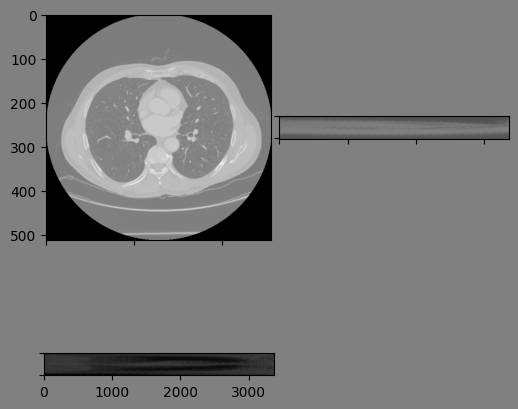

' sd = img3d.std()\n# To import values into the database we need to specify where the data should be stored.\ndescription[\'signal-to-noise\'] = {\n    \'record_id\':  description[\'PatientID\'],\n    \'event_name\': description[\'ReferringPhysician\'],\n    \'field_name\': \'signal-to-noise\',\n    \'value\':      np.where(sd == 0, 0, img3d.mean()/sd).item(),\n}\n# Some other values that we don\'t want to import into the database\ndescription[\'shape_x\'] = img3d.shape[0]\ndescription[\'shape_y\'] = img3d.shape[1]\ndescription[\'shape_z\'] = img3d.shape[2]\n\n# remember to save the structured information into the output folder\nwith open(outputfolder+"/output.json", \'w\') as outfile:\n    outfile.write(json.dumps(description, indent=4, sort_keys=True)) '

In [44]:

    




# pixel aspects, assuming all slices are the same
ps = slices[0].get("PixelSpacing", [1,1])
ss = slices[0].get("SliceThickness",1)
ax_aspect = ps[1]/ps[0]
sag_aspect = ps[1]/ss
cor_aspect = ps[0]/ss

# create 3D array
img_shape = list(slices[0].pixel_array.shape)
img_shape.append(len(slices))
img3d = np.zeros(img_shape)

# fill 3D array with the images from the files
for i, s in enumerate(slices):
    img2d = s.pixel_array
    img3d[:, :, i] = img2d

# plot 3 orthogonal slices
fig=plt.figure(figsize=(6,6))
fig.patch.set_facecolor('gray')
gs1 = gridspec.GridSpec(2,2)
gs1.update(wspace=0.025, hspace=0.05)

a1 = plt.subplot(gs1[0])
plt.imshow(img3d[:, :, img_shape[2]//2], cmap='gray')
a1.set_aspect(ax_aspect)
a1.set_xticklabels([])

a2 = plt.subplot(gs1[1])
plt.imshow(img3d[:, img_shape[1]//2, :], cmap='gray')
a2.set_aspect(sag_aspect)
a2.set_xticklabels([])
a2.set_yticklabels([])

a3 = plt.subplot(gs1[2])
plt.imshow(img3d[img_shape[0]//2, :, :], cmap='gray')
a3.set_aspect(cor_aspect)
a3.set_yticklabels([])

plt.show()

